In [23]:
import pandas as pd
import numpy as np
import random
import requests

# Don't forget to 'pip install fastf1'
import fastf1 as ff1
from fastf1 import plotting
# Don't forget to 'pip install seaborn'
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:

def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

KeyError: 'max_verstappen'

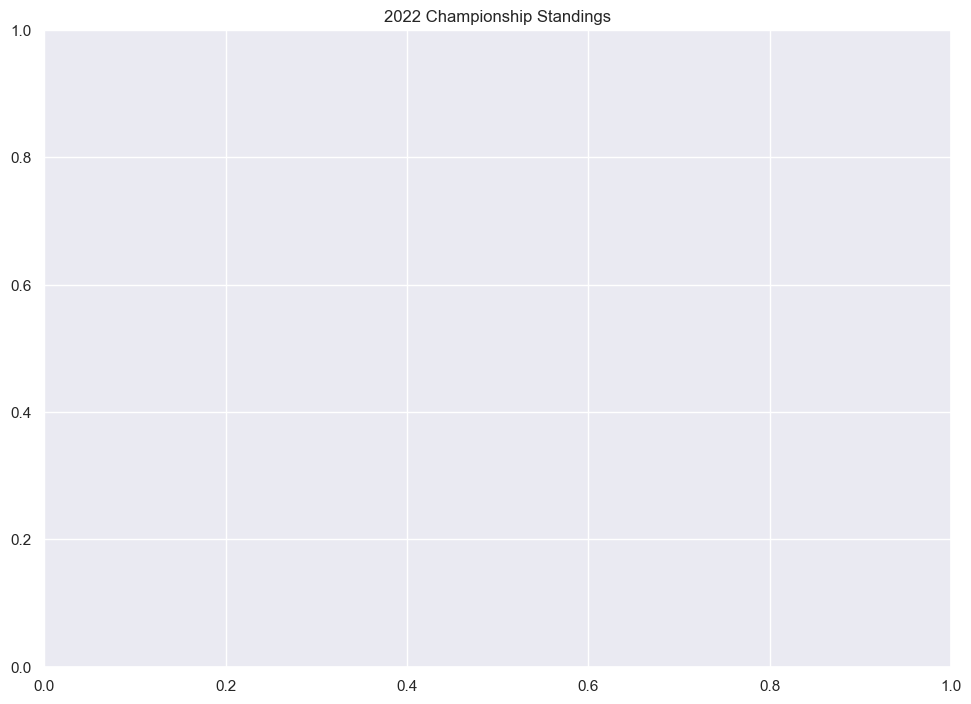

In [28]:
# Increase the size of the plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("2022 Championship Standings")
df = pd.read_csv('driver_standings.csv')

# Draw a line for every driver in the data by looping through all the standings
# The reason we do it this way is so that we can specify the team color per driver
for driver in pd.unique(df['driver'][-22:]):
    sns.lineplot(
        x='round', 
        y='value', 
        data=df.loc[df['driver']==driver], 
        color=ff1.plotting.DRIVER_COLORS(df[driver])
    )

# Invert Y-axis to have championship leader (#1) on top
ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(1, 22))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

# Disable the gridlines 
ax.grid(False)


# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

# Save the plot
plt.savefig('img/championship_standings.png')